In [11]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch

# Load the shape files
state_shape = pd.read_pickle("../data/external/state.pkl")
county_shape = pd.read_pickle("../data/external/county.pkl")
master_df = pd.read_pickle("../data/processed/result_kmeans_df.pkl")

filtered_statefp = state_shape.loc[
    ~state_shape["NAME"].isin(
        [
            "Alaska",
            "Hawaii",
            "Puerto Rico",
            "Commonwealth of the Northern Mariana Islands",
            "American Samoa",
            "United States Virgin Islands",
            "Guam",
        ]
    ),
    "STATEFP",
]

filtered_state_shape = state_shape[state_shape["STATEFP"].isin(filtered_statefp)]
filtered_county_shape = county_shape[county_shape["STATEFP"].isin(filtered_statefp)]

# Zuweisung Farben zu Cluster_ID
code_to_color = {0: "white", 1: "blue", 2: "grey", 3: "orange"}

In [12]:
filtered_county_shape["GEOID"] = filtered_county_shape["GEOID"].astype(int)
result_df = master_df["Cluster_ID"].reset_index()

/home/plang/anaconda3/envs/data_science/lib/python3.12/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [13]:
result_df = filtered_county_shape.merge(
    result_df, how="left", left_on="GEOID", right_on="FIPS"
)

In [14]:
result_df["Color"] = result_df["Cluster_ID"].map(code_to_color)
result_df["Color"] = result_df["Color"].fillna("white")

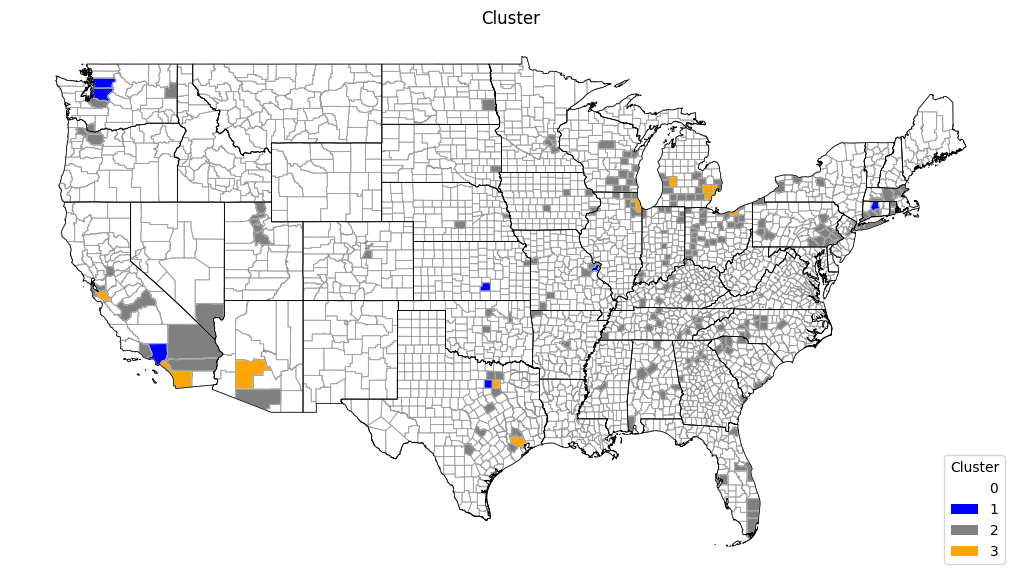

In [15]:
fig, ax = plt.subplots(figsize=(15, 7))  # Diagramm erstellen
result_df.plot(
    facecolor=result_df["Color"], linewidth=0.8, ax=ax, edgecolor="0.8", legend=True
)
filtered_county_shape.plot(
    ax=ax, color="none", edgecolor="gray", linewidth=0.4, alpha=0.5
)
filtered_state_shape.plot(ax=ax, color="none", edgecolor="black", linewidth=0.5)

# Erstellen einer benutzerdefinierten Legende

sorted_code_to_color = sorted(code_to_color.items(), key=lambda x: x[0])
# Erstellen einer benutzerdefinierten Legende
legend_elements = [
    Patch(facecolor=color, label=str(code)) for code, color in sorted_code_to_color
]

ax.legend(handles=legend_elements, title="Cluster", loc="lower right")

plt.title("Cluster")
plt.axis("off")  # Achsen ausschalten
plt.show()